In [144]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = "C:\windows\Fonts\Malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)


In [145]:
totaldata = pd.read_csv('./data/전체보행교통사고.csv', encoding = 'euc=kr')
totaldata.rename(columns={'Unnamed: 0':'년도', '합계':'전체사고'}, inplace = True)

In [50]:
totaldata

,년도,전체사고
0,2007,9579
1,2008,10680
2,2009,11183
3,2010,10946
4,2011,11047
5,2012,11049
6,2013,10854
7,2014,11257
8,2015,11422
9,2016,10816


In [51]:
seniordata = pd.read_csv('./data/노인보행교통사고.csv', encoding = 'euc=kr')
seniordata.rename(columns={'Unnamed: 0':'년도', '합계':'노인사고'}, inplace=True)

In [52]:
seniordata

,년도,노인사고
0,2007,2642
1,2008,3100
2,2009,3609
3,2010,3528
4,2011,3733
5,2012,4197
6,2013,4492
7,2014,5009
8,2015,5388
9,2016,5219


In [113]:
data = pd.merge(totaldata,seniordata, on='년도')
data

,년도,전체사고,노인사고
0,2007,9579,2642
1,2008,10680,3100
2,2009,11183,3609
3,2010,10946,3528
4,2011,11047,3733
5,2012,11049,4197
6,2013,10854,4492
7,2014,11257,5009
8,2015,11422,5388
9,2016,10816,5219


In [58]:
data.set_index(data['년도'], inplace=True)
data

,년도,전체사고,노인사고
년도,,,
2007,2007,9579,2642
2008,2008,10680,3100
2009,2009,11183,3609
2010,2010,10946,3528
2011,2011,11047,3733
2012,2012,11049,4197
2013,2013,10854,4492
2014,2014,11257,5009
2015,2015,11422,5388


In [64]:
data.drop(['년도'], axis=1, inplace=True)
data

,전체사고,노인사고
년도,,
2007,9579,2642
2008,10680,3100
2009,11183,3609
2010,10946,3528
2011,11047,3733
2012,11049,4197
2013,10854,4492
2014,11257,5009
2015,11422,5388


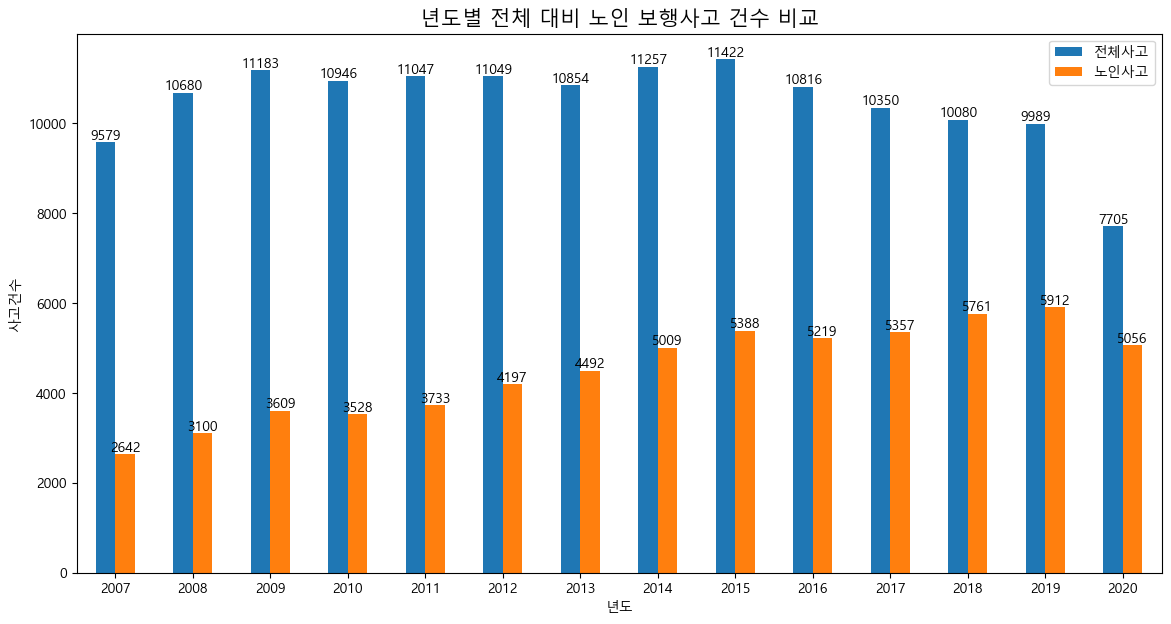

In [152]:
ax = data.plot(x="년도", y=["전체사고", "노인사고"], kind="bar",figsize=(14,7), rot=0)
plt.title('년도별 전체 대비 노인 보행사고 건수 비교', size = 15)
plt.xlabel('년도',fontsize = 10)
plt.ylabel('사고건수', fontsize = 10)

for temp in ax.patches:
    ax.annotate('%d'%temp.get_height(),(temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')
    
plt.show()